In [1]:
import pandas as pd
import numpy as np 
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

In [2]:
df = pd.read_csv(r'C:\Users\ABO-BAKR\Desktop\projects\data analysis\task1 uber\UberDataset.csv')
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [3]:
df.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE'],
      dtype='object')

In [4]:
df.tail()
# i dont need the 'totals' row

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [5]:
df.describe()


,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [19]:
df.isnull().sum()

CATEGORY                  0
START                     0
STOP                      0
MILES                     0
PURPOSE                   0
START_DATE_ONLY           0
START_TIME_ONLY           0
END_DATE_ONLY             0
END_TIME_ONLY             0
Hour_end                  0
DAY_TIMES                 0
minutes_end               0
Hour_start                0
minutes_start             0
Duration_1                0
Duration_2                0
Total_duration_Minutes    0
dtype: int64

In [20]:
df['PURPOSE'].fillna(df['PURPOSE'].mode()[0],inplace=True)
df.isnull().sum()
df.drop(df.index[-1], inplace=True)
df.isnull().sum()
df.sample(5)
df['START'] = df['START'].str.replace('Unknown Location', df['START'].mode()[0], regex=False)
df['STOP'] = df['STOP'].str.replace('Unknown Location', df['STOP'].mode()[0], regex=False)



In [9]:
  
df['START_DATE'] = df['START_DATE'].str.replace('-', '/', regex=False)
df['END_DATE'] = df['END_DATE'].str.replace('-', '/', regex=False)

df['START_DATE']=pd.to_datetime(df['START_DATE'],errors='coerce')
df['END_DATE']=pd.to_datetime(df['END_DATE'],errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     1155 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


In [10]:
df['START_DATE_ONLY'] = df['START_DATE'].dt.date    
df['START_TIME_ONLY'] = df['START_DATE'].dt.time   

df['END_DATE_ONLY'] = df['END_DATE'].dt.date        
df['END_TIME_ONLY'] = df['END_DATE'].dt.time
df.drop(columns=['START_DATE','END_DATE'],inplace=True)
df.sample(5)

,CATEGORY,START,STOP,MILES,PURPOSE,START_DATE_ONLY,START_TIME_ONLY,END_DATE_ONLY,END_TIME_ONLY
742,Business,Islamabad,Islamabad,4.4,Meeting,2016-08-30,13:25:00,2016-08-30,13:46:00
856,Business,Eagle Rock,Cary,3.6,Meeting,2016-10-25,15:16:00,2016-10-25,15:33:00
705,Business,Cary,Cary,17.7,Meeting,2016-08-23,17:42:00,2016-08-23,18:31:00
329,Business,Cary,Morrisville,3.1,Errand/Supplies,2016-04-24,19:07:00,2016-04-24,19:16:00
1054,Business,Cary,Morrisville,10.6,Meeting,2016-12-15,14:20:00,2016-12-15,14:54:00


In [11]:
df['START'] = df['START'].str.replace('?', '', regex=False)
df['STOP'] = df['STOP'].str.replace('?', '', regex=False)
df['START_DATE_ONLY']=pd.to_datetime(df['START_DATE_ONLY'])
df['END_DATE_ONLY']=pd.to_datetime(df['END_DATE_ONLY'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   CATEGORY         1155 non-null   object        
 1   START            1155 non-null   object        
 2   STOP             1155 non-null   object        
 3   MILES            1155 non-null   float64       
 4   PURPOSE          1155 non-null   object        
 5   START_DATE_ONLY  1155 non-null   datetime64[ns]
 6   START_TIME_ONLY  1155 non-null   object        
 7   END_DATE_ONLY    1155 non-null   datetime64[ns]
 8   END_TIME_ONLY    1155 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(6)
memory usage: 81.3+ KB


# most  common trips route

Text(0, 0.5, 'PATH')

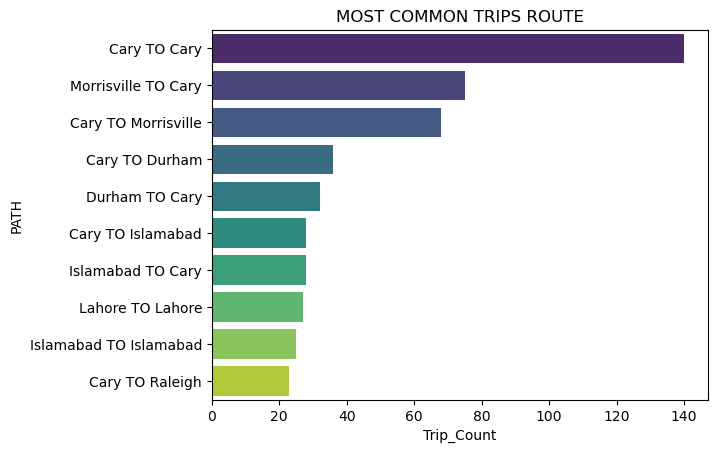

In [12]:

common_trips=df.groupby(['START','STOP']).size().reset_index(name='Trip_Count').sort_values(by='Trip_Count',ascending=False).head(10)
sns.barplot(x='Trip_Count', y=common_trips['START']+" TO " +common_trips['STOP'] , data=common_trips, palette='viridis')
plt.title('MOST COMMON TRIPS ROUTE')
plt.ylabel('PATH')



# 📂 Trip Categories

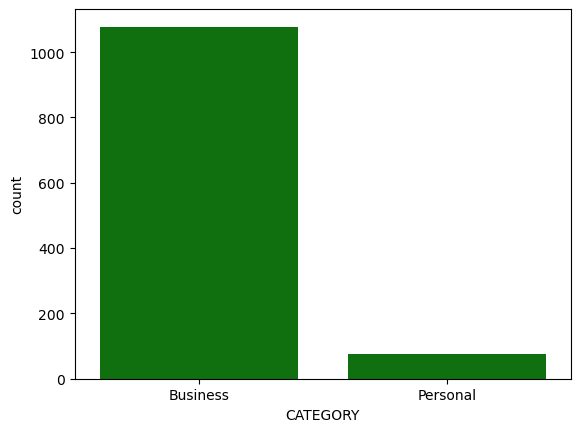

In [13]:
sns.countplot(data=df,x=df['CATEGORY'],color="green")
plt.show()




##  Trips Distrbution


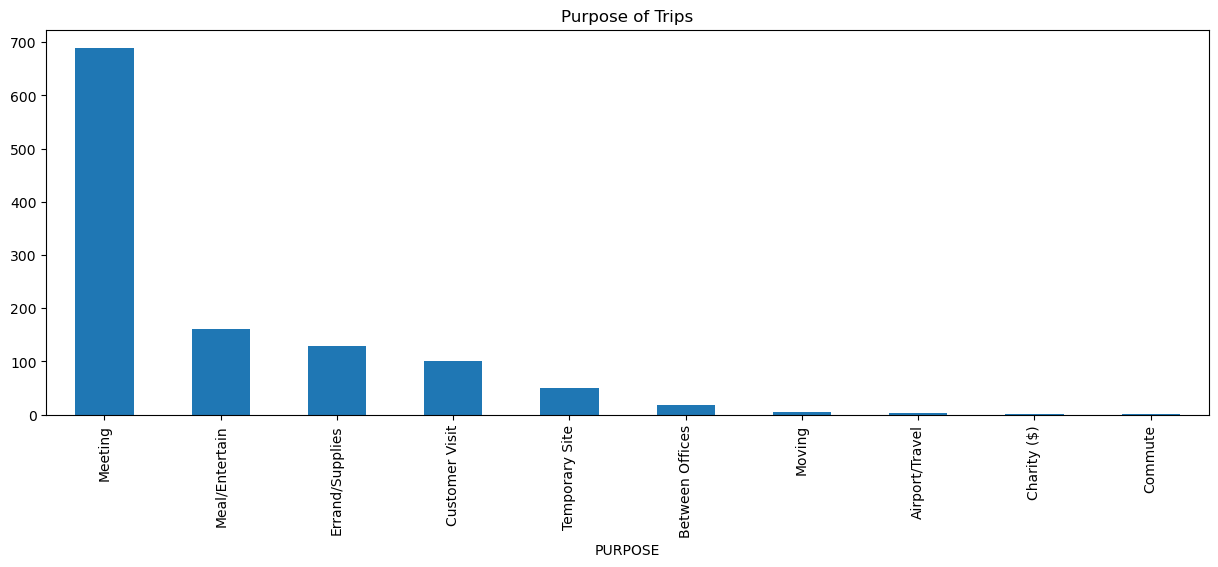

In [14]:
trip_purposes = df['PURPOSE'].value_counts().sort_values(ascending=False)
trip_purposes=trip_purposes.head(10)


plt.figure(figsize=(15, 5))
trip_purposes.plot(kind='bar')
plt.title('Purpose of Trips')
plt.ylabel('')
plt.show()

#  distance (in miles) 

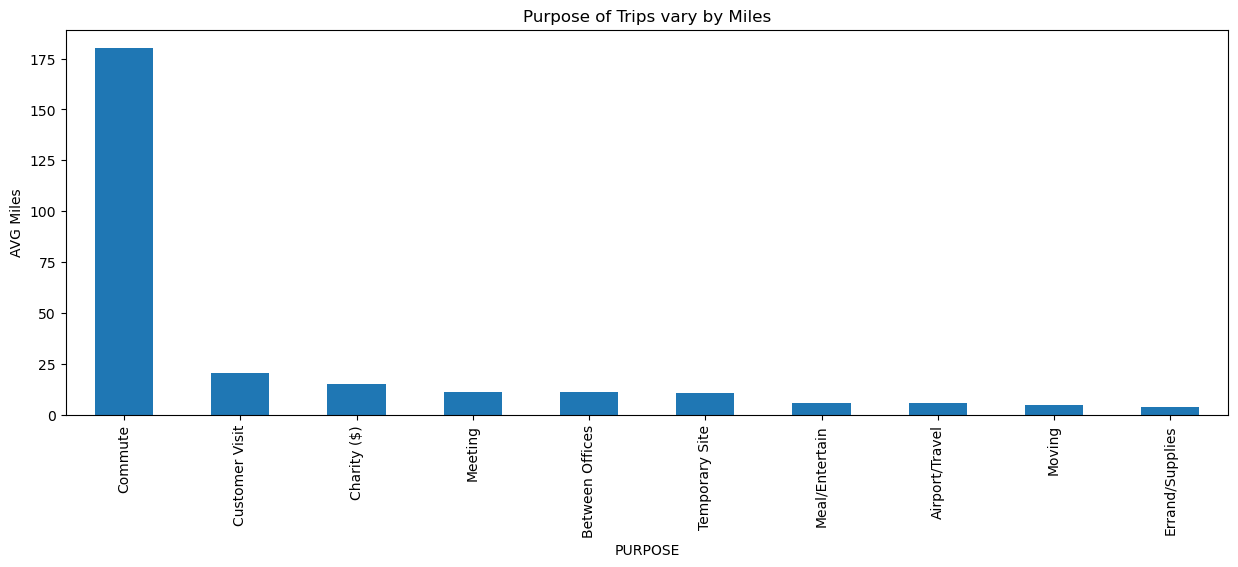

In [15]:
trip_purposes_MIles = df.groupby('PURPOSE')['MILES'].mean().sort_values(ascending=False)
plt.figure(figsize=(15, 5))
trip_purposes_MIles.plot(kind='bar')
plt.title('Purpose of Trips vary by Miles')
plt.ylabel('AVG Miles')
plt.show()

##  the most usage time (hour) 

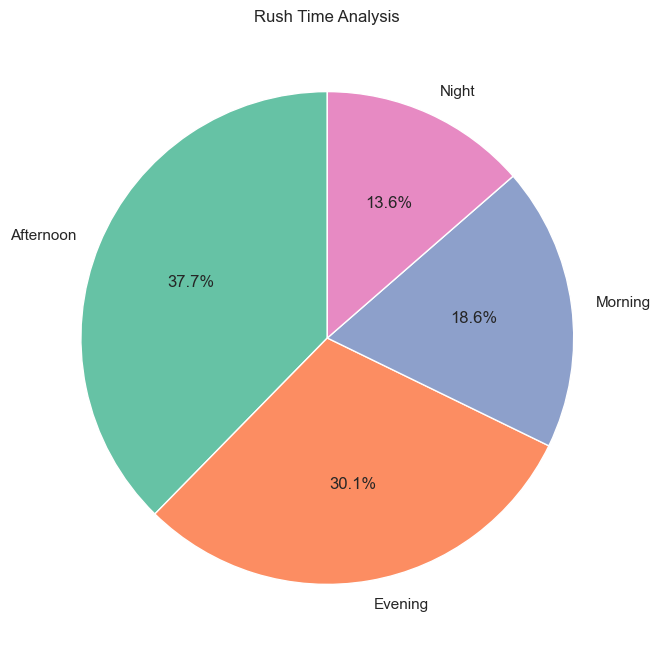

In [16]:
def categorize_time(hour):    
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'
#print(df['END_TIME_ONLY'].dtype)
df['END_TIME_ONLY'] = df['END_TIME_ONLY'].astype(str)
df['Hour_end'] = df['END_TIME_ONLY'].str.split(':').str[0].astype(int)
df['DAY_TIMES']=df['Hour_end'].apply(categorize_time)
rush_times=df.groupby('DAY_TIMES').size().reset_index(name='TRIP_COUNT').sort_values(by='TRIP_COUNT',ascending=False)
rush_times
sns.set(style="whitegrid")
plt.figure(figsize=(8, 8))
plt.pie(rush_times['TRIP_COUNT'], labels=rush_times['DAY_TIMES'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2", len(rush_times)))
plt.title('Rush Time Analysis')
plt.show()


##   Distance and Time Category

C:\Users\ABO-BAKR\AppData\Local\Temp\ipykernel_7860\246563975.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='DAY_TIMES', y='MILES', hue='CATEGORY',ci=None)


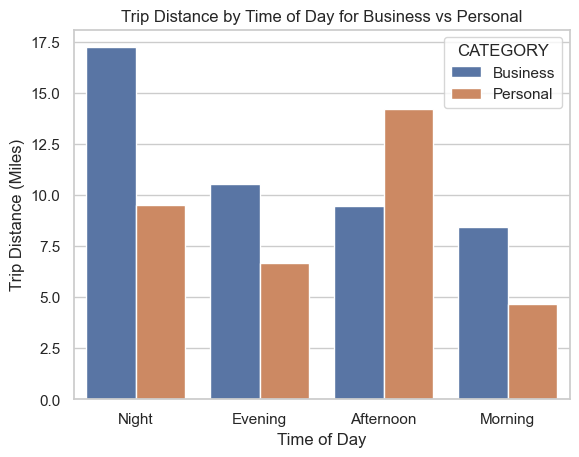

In [17]:
sns.barplot(data=df, x='DAY_TIMES', y='MILES', hue='CATEGORY',ci=None)
plt.title('Trip Distance by Time of Day for Business vs Personal')
plt.xlabel('Time of Day')
plt.ylabel('Trip Distance (Miles)')
plt.show()

#  Average Duration 

count    1155.000000
mean       23.243290
std        27.318277
min         0.000000
25%        10.000000
50%        16.000000
75%        27.500000
max       336.000000
Name: Total_duration_Minutes, dtype: float64


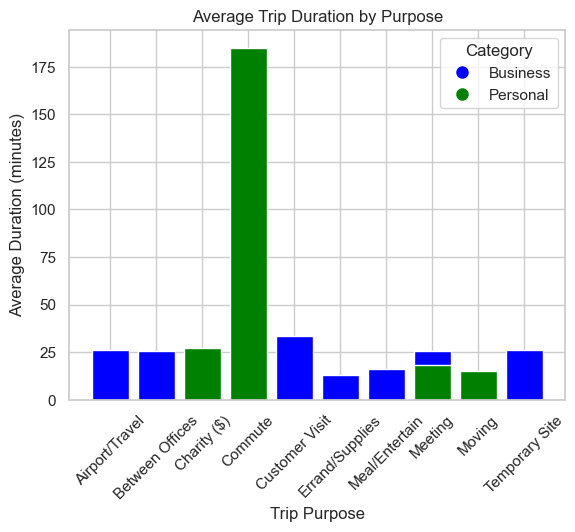

In [18]:

df['minutes_end']=df['END_TIME_ONLY'].str.split(':').str[1].astype(int)
df['START_TIME_ONLY']=df['START_TIME_ONLY'].astype(str)
df['Hour_start']=df['START_TIME_ONLY'].str.split(':').str[0].astype(int)
df['minutes_start']=df['START_TIME_ONLY'].str.split(':').str[1].astype(int)
df['Duration_1']=df['Hour_end']-df['Hour_start']
df['Duration_2']=df['minutes_end']-df['minutes_start']
df.loc[df['Duration_2'] < 0, 'Duration_1'] -= 1
df.loc[df['Duration_2'] < 0, 'Duration_2'] += 60
df.loc[df['Duration_1'] < 0, 'Duration_1'] += 24
df['Total_duration_Minutes'] = df['Duration_1'] * 60 + df['Duration_2']


print(df['Total_duration_Minutes'].describe())
df['Total_duration_Minutes'] = df['Duration_1'].astype(int)*60 + df['Duration_2'].astype(int)

average_duration_by_purpose = df.groupby(['PURPOSE','CATEGORY'])['Total_duration_Minutes'].mean().reset_index()
category_colors = {'Business': 'blue', 'Personal': 'green'}
average_duration_by_purpose['color'] = average_duration_by_purpose['CATEGORY'].map(category_colors)

plt.bar(average_duration_by_purpose['PURPOSE'], average_duration_by_purpose['Total_duration_Minutes'], color=average_duration_by_purpose['color'])
plt.title('Average Trip Duration by Purpose')
plt.xlabel('Trip Purpose')
plt.ylabel('Average Duration (minutes)')
plt.xticks(rotation=45)
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in category_colors.values()]
labels = list(category_colors.keys())
plt.legend(handles=handles, labels=labels, title='Category')
plt.show()